# Language Modeling

* we will create step by step `makemore` a repositry made by Andrej Karpathy. For more detailed explanation check out the link: https://www.youtube.com/watch?v=PaCmpygFfXo&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=2

* `names.txt` has 30 k names

In [95]:
words = open('names.txt', 'r').read().splitlines()

In [96]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [97]:
len(words)

32033

In [98]:
min(len(w) for w in words)

2

In [99]:
max(len(w) for w in words)

15

### Bigram Modelling

* Basically, each name such as `olivia` telling `model` that in a name 'o' will come first, 'l' will come after 'o', 'i' will come after 'ol', 'v' will come after 'oli' and so on..
and at the end , any name will end just after fully writing the word 'olivia'. That's what 32033 words will tell the model differently according to their names and that's how model will start to learn.

* we will basically count that, how often any one of these combinations occurs in a training set such as 'ol' combination, 'oli' combination, etc.

* The language model neural net that we are going to use is `bigram` : "one character simply predicts a next one with a lookup table of counts"

* In this modelling we are working with two characters at a time, we are looking at one character given and we try to predict next character in the sequence.

In [100]:
# Creating a dictionary 'b' that will maintain the counts and this will map `bigram` defined below
b = {}
for w in words[:1]:
  # Now creating a special array here (all characters) and hallucinate a special start token <S> and a special end token <E>.
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]): # Iterating ch1 and ch2 together
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1 # b.get(bigram, 0) : returns 'value' of bigram from b (Note: here 'value' of each bigram is 'count')
    # b.get(bigram, 0) : returns '0' if bigram key is not present inside the 'b' dictionary.
    print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


In [101]:
w

'emma'

In [102]:
w[1:]

'mma'

In [103]:
b

{('<S>', 'e'): 1, ('e', 'm'): 1, ('m', 'm'): 1, ('m', 'a'): 1, ('a', '<E>'): 1}

* Now , doing this for all the words after removing 'print()'

In [104]:
# Creating a dictionary 'b' that will maintain the counts and this will map `bigram` defined below
b = {}
for w in words:
  # Now creating a special array here (all characters) and hallucinate a special start token <S> and a special end token <E>.
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]): # Iterating ch1 and ch2 together
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1 # b.get(bigram, 0) : returns 'value' of bigram from b (Note: here 'value' of each bigram is 'count')
    # b.get(bigram, 0) : returns '0' if bigram key is not present inside the 'b' dictionary.
  

In [105]:
# b # if you want you can run this to check 'b'.

In [106]:
# b.items() # returns (key, value) # if you want , you can run this code.

In [107]:
# default sort is on the first item of tuple, but we want to sort based on 'value'
# So we want to use key = lambda that takes key value kv and returns kv at the one ( kv[1] ) not at zero but one, that's count so we want to sort by the count of these elements
# and we actually want to go backwards that is descending order, so we will use -kv[1].
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

`NOTE`: In sorted, `key` is like a pointer which goes to every element of given list, tuple, etc; from start and use `key` to decide how pointer should interact with the element.

* We are going to store this information in a two dimensional array instead of a python dictionary so rows going to be the first character of bigram and the columns going to be the second character of the bigram
and each entry in this 2D-array will tell us how often that first character files the second character in the data set.

* Basically, How often second follows the first.

In [108]:
import torch

In [109]:
N = torch.zeros((28, 28), dtype=torch.int32)


In [110]:
chars = sorted(list(set(''.join(words)))) # concatenate all of the strings inside the word, this goes inside the 'set',
# set will throw out duplicates from this massive string , eventually each alphabet will only left, and then 'list' will split all the characters.

stoi = {s:i for i,s in enumerate(chars)}
# enumerate basically gives us this iterator over the integer index and the actual element of the list and then we are mapping character to the integer.

In [111]:
stoi['<S>'] = 26
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [112]:
for w in words:
  # Now creating a special array here (all characters) and hallucinate a special start token <S> and a special end token <E>.
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]): # Iterating ch1 and ch2 together
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [113]:
# Reverse of stoi
itos = {i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

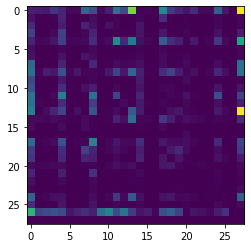

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

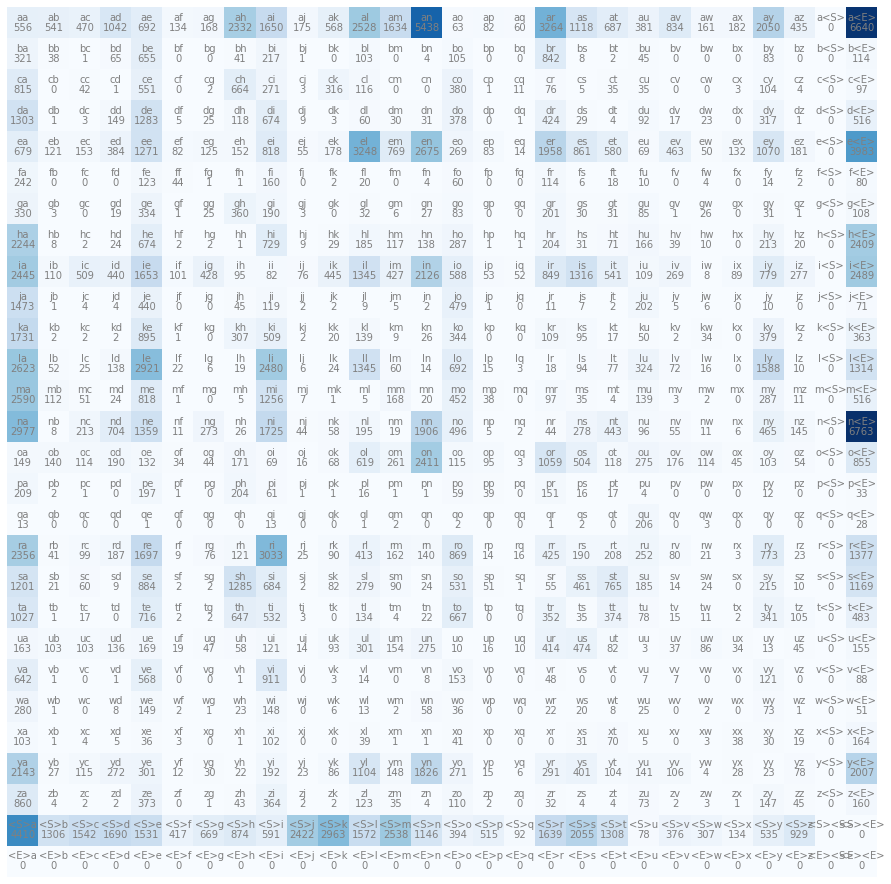

In [115]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
  for j in range(28):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off');


* Now we will work with only one special token , to make things prettier

In [116]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [117]:
stoi = {s:i+1 for i,s in enumerate(chars)} # So that 'a' starts with 1.
stoi['.'] = 0 # Only one special token "."
itos = {i:s for s,i in stoi.items()}

In [118]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [ ]:
for w in words:
  # Now creating a special array here (all characters) and hallucinate a special start token <S> and a special end token <E>.
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]): # Iterating ch1 and ch2 together
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Reds')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off');


* This is our counts array of our entire data set. we're going to following these counts and we're going to start sampling from the model.

In [ ]:
N[0, :] # this will show all the elements of the first row of above figure. 

In [ ]:
N.shape

In [ ]:
N[0] # Same as above

In [ ]:
# making all these in probabilities
p = N[0].float()
p = p / p.sum()
p

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

* To sample from this distributions we're going to use `torch.multinomial` , returns sample from multinomial probability distribution which is complicated way of saying, 
you give me probabilities and I will give you integers which are sampled according to probability distribution. 

* we will also use `generator` , that makes everything deterministic, so when you run the code, produces pseudo random numbers.
Used as a keyword argument in many In-place random sampling functions.

In [ ]:
g = torch.Generator().manual_seed(2147483647) # Getting same random number every single time we run the cell.
p = torch.rand(3, generator=g)
p = p / p.sum()
p

In [ ]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)
# replacement equals true means that when we draw an element, we will draw it and then we will put it
# back into the list of eligible indices to draw again.

* Returns a `tensor` where each row contains `num_samples` indices sampled from the `multinomial probability distribution` located in the corresponding row of tensor input.

* from `p` above, we can say that, `60%` will be 0, `30%` will be 1, around `10%` will be 2.

In [ ]:
p.shape

In [ ]:
g = torch.Generator().manual_seed(2147483647) # Getting same random number every single time we run the cell.

for i in range(20):
  out = [] # feed the outputs inside this list.
  ix = 0

  while True:
    p = N[ix].float() # Grabing the row that we currently on and then converting it to float.
    p = p / p.sum() # converting p to probability
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    # ix will tell us what index is going to be the next.
    # print(itos[ix]) # print the word that we are currently at.
    out.append(itos[ix]) # fill the output
    if ix == 0:
      break

  print(''.join(out)) # join the strings inside the `out` list

* We see above is that, names are no written correctly. Our Bigram is so `terrible`.
* also it is showing some names 'h.' that is invalid. This is because our model only knows that 'h' was previously and how likely h is the last character, well it's somewhat likely and so it just makes it last character and it doesn't know that there were other things before it or there were not other things before it.


* We're always fetching a row of N from the counts matrix up ahead and then we're always doing the same things, we're doing this every single iteration and we just keep `renormalizing` these rows over and over again and it's extremely inefficient and wasteful.

* To fix this we will simply make a `2Darray: P` that will already store all the probability distribution row wise of N.

In [ ]:
P = torch.zeros((27, 27))
for j in range(27):
  q = N[j].float()
  q = q / q.sum()
  P[j] = q


* Another way of making `P`

* `P.sum(1, keepdim=True)`: In this code, `1` is `2nd Dimension`, `keepdim` will keep dimension of the row, and add all the elements of row and so, shape will become `(27, 1)`.
* `P.sum(0, keepdim=True)`: In this code, `0` is `1st Dimension`, `keepdim` will keep dimension of the column, and add all the elements of column and so, shape will become `(1, 27)`.
* If `keepdim=False` then it will remove that dimension around which we are summing up.

In [ ]:
P.sum(1, keepdim=True).shape 

In [ ]:
P.sum(1, keepdim=True)

In [ ]:
P.sum(1)

In [ ]:
P.sum(1).shape

In [ ]:
# 27 27
#    27

In [ ]:
P = N.float()

In [ ]:
P = P / P.sum(1, keepdim=True)

* `keepdim=True/False` is to manipulate broadcasting.

In [ ]:
g = torch.Generator().manual_seed(2147483647) # Getting same random number every single time we run the cell.

for i in range(20):
  out = [] # feed the outputs inside this list.
  ix = 0
  while True:
    p = P[ix] # Grabing the row that we currently on and then converting it to float.
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    # ix will tell us what index is going to be the next.
    # print(itos[ix]) # print the word that we are currently at.
    out.append(itos[ix]) # fill the output
    if ix == 0:
      break

  print(''.join(out)) # join the strings inside the `out` list

In [ ]:
for w in words[:3]:
  # Now creating a special array here (all characters) and hallucinate a special start token '.' and a special end token '.'.
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]): # Iterating ch1 and ch2 together
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2] # watching probability of ix1 and ix2.
    print(f'{ch1}{ch2}: {prob:.4f}')

* `NOTE:` Clearly, if all characters or tokens have equally likely probability then the probability each would have `1/27 = 0.0370370..`

* Anything above it or below it, simply means our `bigram` model has learned something.

* If our `bigram` model would have been perfect, It should have given probability `1` for predicting characters as shown above.

##### MAXIMUM LIKELIHOOD ESTIMATION

* Now, Let's summarize these probabilities into a single number that measures the quality of this model .

* `likelihood:` product of all of these probabilities, telling us probability of entire dataset assigned by the model that we've trained and that is a `measure of quality`.

`Official definition:` The extent to which the sample provides supports for any particular parameter value. Higher support corresponds to a higher value for the `likelihood`.
`For discrete:`

`L(@*; y) = Prob(Y=y|@ = @*) = fy(y;@*)`

`For independent probs: It will be product of P((xi,yi)|w=w0), where i =1, 2, 3, 4.. and (xi, yi) is each given (input, output) pair.`

* `Our target`: To make sure probability is high as possible when you are training the model.

* `NOTE:` Here probabilities are in between 0 and 1, that simply means there product will be far more less.
And so for convenience, we use `log likelihood`

In [ ]:
log_likelihood = 0.0
n = 0

for w in words[:3]:
  # Now creating a special array here (all characters) and hallucinate a special start token '.' and a special end token '.'.
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]): # Iterating ch1 and ch2 together
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2] # watching probability of ix1 and ix2.
    logprob = torch.log(prob)
    log_likelihood += logprob
    n+=1
    print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'average nll,{nll/n=}')

* `NOTE:` `Negative likelihood` is a very `good loss function` because the **lowest it can get is zero** and on higher values of it, **gets worsen**.

* also people make this `-likelihood` average, rather than just a sum.

* `Goal`:

  * `maximize likelihood` of the data w.r.t model parameters (statistical modeling)
  * equivalent to maximizing the `log likelihood` (because `log is monotonic`)
  * equivalent to `minimizing` the `average negative log likelihood`

In [ ]:
log_likelihood = 0.0
n = 0

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]): # Iterating ch1 and ch2 together
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2] # watching probability of ix1 and ix2.
    logprob = torch.log(prob)
    log_likelihood += logprob
    n+=1
    #  print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'average nll,{nll/n=}')

* Now, many a times, you will have some names that have possibility according to our model, equal to `zero`.
In such case, our `loss function` will result, infinity and so to fix this: most common way people use is to add `a number` to each combination of the `model`.

For example, you can add `1` to each element of `N`. Larger the value you add to this number, More uniformity you will get.


In [ ]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [ ]:
g = torch.Generator().manual_seed(2147483647) # Getting same random number every single time we run the cell.

for i in range(20):
  out = [] # feed the outputs inside this list.
  ix = 0
  while True:
    p = P[ix] # Grabing the row that we currently on and then converting it to float.
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    # ix will tell us what index is going to be the next.
    # print(itos[ix]) # print the word that we are currently at.
    out.append(itos[ix]) # fill the output
    if ix == 0:
      break

  print(''.join(out)) # join the strings inside the `out` list

In [ ]:
log_likelihood = 0.0
n = 0

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]): # Iterating ch1 and ch2 together
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2] # watching probability of ix1 and ix2.
    logprob = torch.log(prob)
    log_likelihood += logprob
    n+=1
    #  print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'average nll,{nll/n=}')

* we've trained a respectable bi-gram character level language model.

### `Neural Network Approach`

* we will cast the problem of `bi-gram character level language modeling` into the `neural network framework`.

In [ ]:
# create the training set of bigrams (x, y)
# i.e. creating inputs `xs` and targets `ys`
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs) # making xs list to tensor
ys = torch.tensor(ys) # making ys list to tensor

In [ ]:
xs

In [ ]:
ys

* So, xs and ys is saying that, when in xs, 0 comes, high probability that next will be 5; when in xs, 5 comes, high probability that next will be 13, and so on..

* `NOTE:` In `pytorch`, you can use `torch.tensor` or `torch.Tensor` (This one is class). The only difference in between two is that 
`torch.Tensor` automatically converts input into `float` but `torch.tensor` makes `dtype` exactly same as input. So it is advised to 
use **`torch.tensor`**, Because you can convert `dtype` later on.

* It is not good to use directly integer inputs into neurons for modeling our neural network.

* That's where we use `One Hot Encoding`
  * In `one hot encoding` we take an integer like 13 and create a vector that is all `zeros` except for the 13th dimension which we turn to `one` and then that vector can feed into a `neural net`.
  * In `pytorch`, for one hot encoding, we use : `torch.nn.functional.one_hot`

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27)
xenc

* `xs` converted to `one hot encoding`

In [ ]:
xenc.dtype

* Here `dtype` is integer, But we want to work `with floating points` in `neural nets` so it can take various floating values.

In [ ]:
xenc = xenc.float()

In [ ]:
xenc.shape

In [ ]:
plt.imshow(xenc)

In [ ]:
xenc.dtype

* Initializing weights of neural network with random values.
  * We will use `torch.randn`, that is, `normal distribution` so most of the random values are around zero and some around like 2 or 3.

In [ ]:
W = torch.randn((27, 27)) # Creating size of (27,27)

* Now multiplying `weights` with `inputs`

In [ ]:
xenc @ W # This is matrix multiplication operator in pytorch.

In [ ]:
# (5, 27) * (27, 27) = (5, 27)

In [ ]:
(xenc @ W).shape

* This (xenc @ W) telling us that for every one of 27 neurons that we created, what is firing rate of those neurons on every one of those five examples.

* So we have fed our `27-Dimensional inputs` into a `first layer of a neural net that has 27 neurons`. These 27 neurons perform w*x, they don't have a `bias` and they don't have `non-linearity` like `tanh`, we're going to leave them to be a linear layer.

* This will be our only layer in between input and output, for this modal, The dumbest simplest neural net.

* `NOTE:` Now in `(xenc @ W)` some values are negative and some are positive, and we want these to somehow represent the probabilities for the next character. But `probabilities` are `Only positive` and have values between `0` and `1`.
 And they can't be counts because `counts are postive and are integers`, `So counts are also not good thing to output from a neural net` , now shape of `(xenc @ W)` is (5, 27); these 27 are basically `log counts` and so to get the counts we have to take `exponentiation`  of it.

In [ ]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts/counts.sum(1, keepdims=True)
print(f"counts: {counts}") 
print(f"probs: {probs}")

In [ ]:
probs.shape 

In [ ]:
probs[0].sum()

#### `Summary:` what we have done in `Neural Net` so far:


In [ ]:
xs

In [ ]:
ys

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs.
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are called `softmax`

* We have made a `probs` (That is probability), and this is actually what we call `softmax function`.

In [ ]:
probs.shape

* Let's explain our `bigram`:

In [ ]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print("---------------------------")
  print(f"bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})")
  print('input to the neural net:', x)
  print("output probabilities from the neural net:", probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('===========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

* The way you `optimize` our model, is to start with some random weights, and we have `loss function` which made up of differentiable operations and we can minimize the loss by tuning `w (weights)`
by computing gradients of the loss w.r.t these `w` metrices.

#### `OPTIMIZATION`

In [ ]:
xs

In [ ]:
ys

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [ ]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character 'softmax'

* `Forward pass` keeps track of all the operations under the hood, it builds a `full computational graph` (Just like we made in `micrograd`)

In [ ]:
probs.shape

* To understand `how we will optimize` lets see in which probabilities we are interested in.

In [ ]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0] # ***

* Making above `tuple` into `tensor`.

In [ ]:
torch.arange(5)

In [ ]:
probs[torch.arange(5), ys] # Probabilities we want close to 1 for our given input (A single word) # ***

In [ ]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

In [ ]:
print(loss.item())

In [ ]:
# backward pass

W.grad = None # set to zero the gradient
# Doing Backpropagation in the `loss function` : `Negative log likelihood`
loss.backward()

* `.backward()` then fills in the `gradients` of all the intermediates all the way back to `W`s, which are the parameters of neural net.

In [ ]:
print(W.shape == W.grad.shape) # Checking if they are same
W.shape

In [ ]:
W.grad # This will show which particular weights has to be decreased or increased, so to minimize the loss.

* We have only one parameter in our neural network : `W`

In [ ]:
W.data += -0.1 * W.grad # Taking `0.1` as our learning rate. 

* Now after updating our `W data`, We will again do the `forward pass`.

In [ ]:
# forward pass 2nd time
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character 'softmax'
loss = -probs[torch.arange(5), ys].log().mean() # loss calculation

In [ ]:
loss.item()

* Hence compairing loss from previous one, we can see it gets decreased.

#### `summarizing The full model`

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
# gradient descent
for k in range(10):
  
  # forward pass
  # xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

* `0.01*(W**2).mean()` this in the `loss` function is `ridge regularization`, so that our model do not become complex and `our model should not get overfit`.

In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

* We have sampled our `neural net` model.